## Project: Time Series Analysis on temperature from my birthday until end of 2022

In [22]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use("ggplot")


# Import the relevant sklearn packages
from statsmodels.api import OLS, add_constant
from sklearn.preprocessing import OneHotEncoder
from sklearn.linear_model import LinearRegression

# Set figure size to (14,6)
plt.rcParams['figure.figsize'] = (14,6)
plt.rcParams['font.size'] = '14'

In [23]:
df= pd.read_csv('TG_STAID002759.csv',sep=',',skiprows=19, parse_dates=True, index_col=1, skipinitialspace=True)
df

,SOUID,TG,Q_TG
DATE,,,
1876-01-01,127488,22,0
1876-01-02,127488,25,0
1876-01-03,127488,3,0
1876-01-04,127488,-58,0
1876-01-05,127488,-98,0
...,...,...,...
2022-12-27,111448,42,0
2022-12-28,111448,63,0
2022-12-29,111448,100,0


In [24]:
df = df.drop(['SOUID', 'Q_TG'], axis=1)

In [25]:
df = df.rename(columns={'TG': 'mean_temp'})

In [26]:
df.loc[:] *=0.1

In [27]:
df

,mean_temp
DATE,
1876-01-01,2.2
1876-01-02,2.5
1876-01-03,0.3
1876-01-04,-5.8
1876-01-05,-9.8
...,...
2022-12-27,4.2
2022-12-28,6.3
2022-12-29,10.0


In [32]:
# select rows within the date range '1991-07-09' to '2022-12-31'
start_date = '1991-07-09'
end_date = '2022-12-31'
df = df.loc[start_date:end_date]

In [33]:
df

,mean_temp
DATE,
1991-07-09,23.4
1991-07-10,19.6
1991-07-11,24.8
1991-07-12,25.7
1991-07-13,21.9
...,...
2022-12-27,4.2
2022-12-28,6.3
2022-12-29,10.0


### Train-Validation split

In [34]:
df_train = df[:-365]

df_test = df[-365:]

### EDA

In [35]:
def plot_meantemp(df, title='Daily mean temperature since 1991', ylim=True):
    df.plot()
    plt.title(title)
    plt.ylabel('# of mean temperature in C')
    if ylim:
        plt.ylim(ymin=0)
    plt.show()

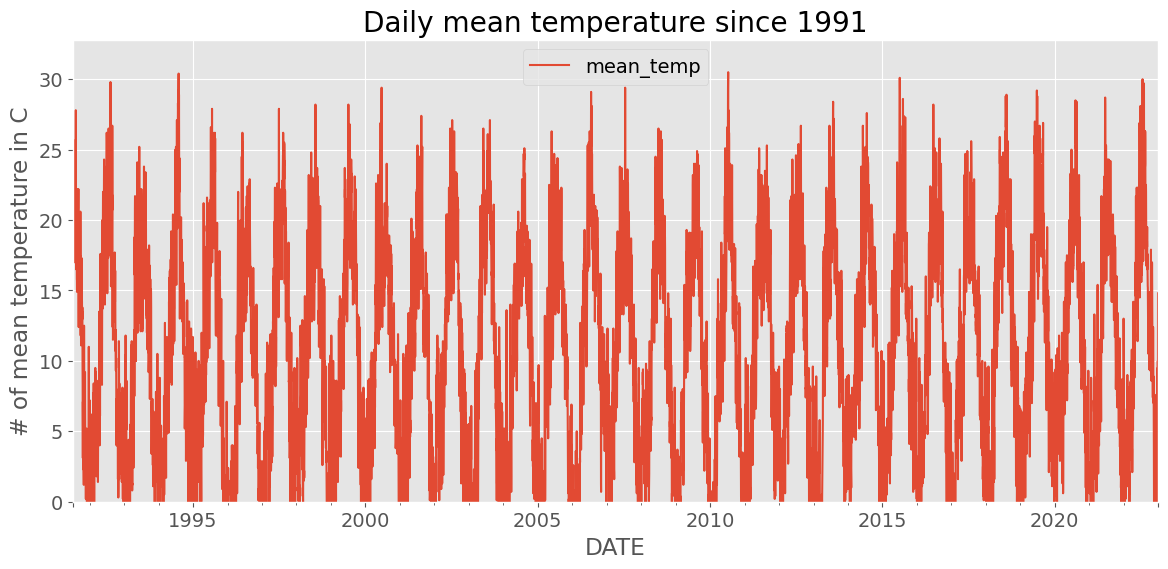

In [36]:
plot_meantemp(df)

### Model the trend

In [41]:
# Create a monthly column for the trend
df['month'] = df.index.month
df.head()

,mean_temp,month,timestep
DATE,,,
1991-07-09,23.4,7,0
1991-07-10,19.6,7,1
1991-07-11,24.8,7,2
1991-07-12,25.7,7,3
1991-07-13,21.9,7,4


In [42]:
# Create a timestep variable
df['timestep'] = list(range(len(df)))
df.head()

,mean_temp,month,timestep
DATE,,,
1991-07-09,23.4,7,0
1991-07-10,19.6,7,1
1991-07-11,24.8,7,2
1991-07-12,25.7,7,3
1991-07-13,21.9,7,4


In [43]:
# Run a Linear Regression
m = LinearRegression()
X = df[['timestep']]
y = df.mean_temp
m.fit(X, y)

LinearRegression()

### Plot the trend and the original data

In [44]:
# Use the model to make a prediction
df['trend'] = m.predict(X)
df.head(15)

,mean_temp,month,timestep,trend
DATE,,,,
1991-07-09,23.4,7,0,9.681320
1991-07-10,19.6,7,1,9.681461
1991-07-11,24.8,7,2,9.681603
1991-07-12,25.7,7,3,9.681745
1991-07-13,21.9,7,4,9.681887
1991-07-14,18.6,7,5,9.682028
1991-07-15,19.4,7,6,9.682170
1991-07-16,18.1,7,7,9.682312
1991-07-17,17.9,7,8,9.682454


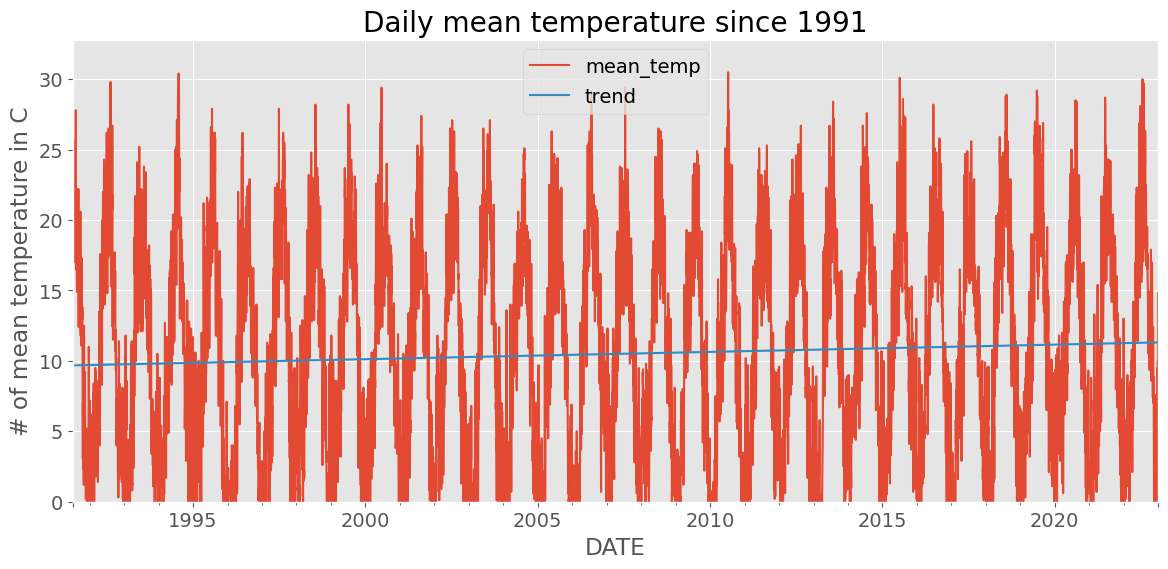

In [45]:
plot_meantemp(df[['mean_temp', 'trend']])

In [46]:
import plotly.express as px
px.scatter(df[['mean_temp','trend']])

In [47]:
m.intercept_,m.coef_

(9.681319567296967, array([0.00014176]))

### Model the seasonality

In [48]:
pd.get_dummies(df.month,prefix='month')

,month_1,month_2,month_3,month_4,month_5,month_6,month_7,month_8,month_9,month_10,month_11,month_12
DATE,,,,,,,,,,,,
1991-07-09,0,0,0,0,0,0,1,0,0,0,0,0
1991-07-10,0,0,0,0,0,0,1,0,0,0,0,0
1991-07-11,0,0,0,0,0,0,1,0,0,0,0,0
1991-07-12,0,0,0,0,0,0,1,0,0,0,0,0
1991-07-13,0,0,0,0,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
2022-12-27,0,0,0,0,0,0,0,0,0,0,0,1
2022-12-28,0,0,0,0,0,0,0,0,0,0,0,1
2022-12-29,0,0,0,0,0,0,0,0,0,0,0,1


In [49]:
# One-Hot-Encoding the month
seasonal_dummies = pd.get_dummies(df.month,prefix='month')
# sklearn.preprocessing.OneHotEncoder

df = df.join(seasonal_dummies)

In [51]:
# Define X and y
X = df.drop(columns=['mean_temp', 'month', 'trend'])

In [53]:
m.fit(X, y)

LinearRegression()

In [54]:
# Create a model with trend and seasonality
df['trend_seasonal'] = m.predict(X)
df.head()

,mean_temp,month,timestep,trend,month_1,month_2,month_3,month_4,month_5,month_6,month_7,month_8,month_9,month_10,month_11,month_12,trend_seasonal
DATE,,,,,,,,,,,,,,,,,
1991-07-09,23.4,7,0,9.681320,0,0,0,0,0,0,1,0,0,0,0,0,19.376691
1991-07-10,19.6,7,1,9.681461,0,0,0,0,0,0,1,0,0,0,0,0,19.376832
1991-07-11,24.8,7,2,9.681603,0,0,0,0,0,0,1,0,0,0,0,0,19.376972
1991-07-12,25.7,7,3,9.681745,0,0,0,0,0,0,1,0,0,0,0,0,19.377112
1991-07-13,21.9,7,4,9.681887,0,0,0,0,0,0,1,0,0,0,0,0,19.377252


### Plot the original data and the trend

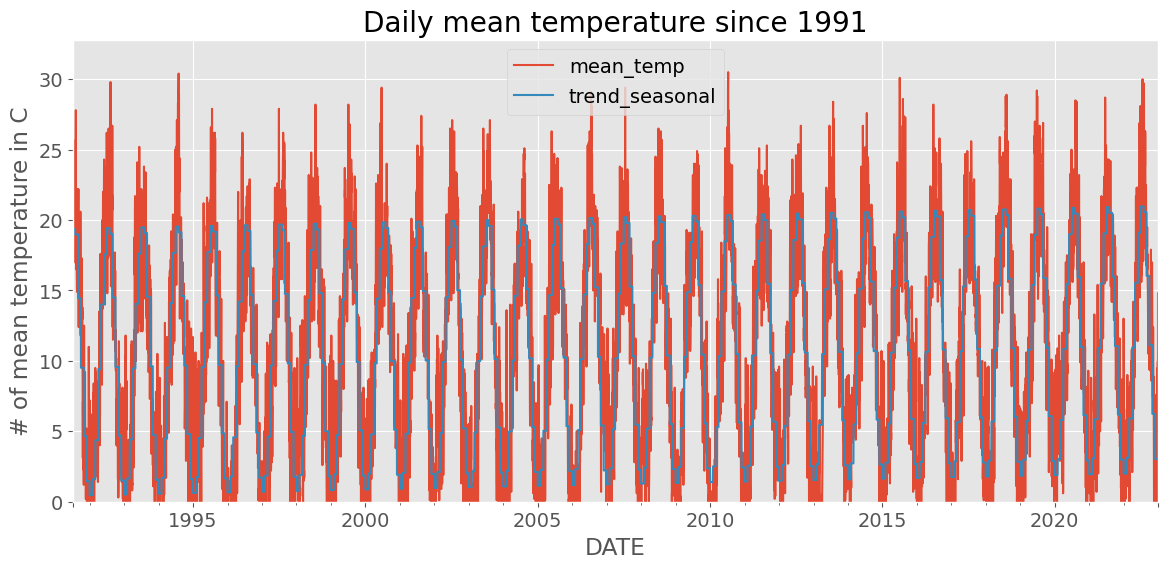

In [55]:
plot_meantemp(df[['mean_temp', 'trend_seasonal']])

### Extract the remainder

In [57]:
# We want to extract the part of the model that the trend_seasonal is not able to explain
df['remainder'] = df.mean_temp - df.trend_seasonal

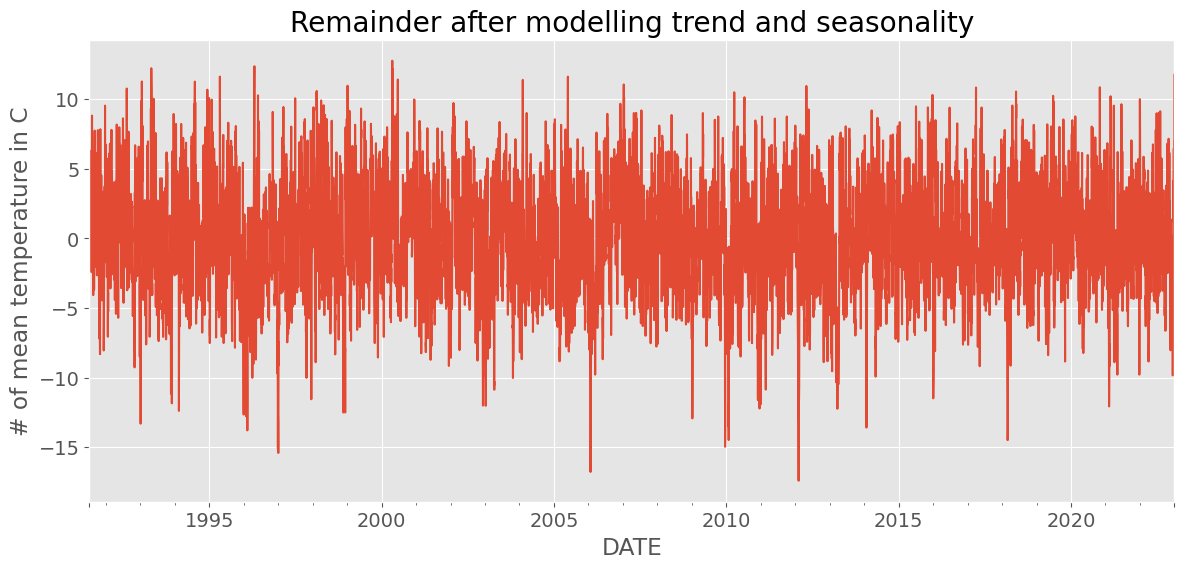

In [67]:
plot_meantemp(df['remainder'], title='Remainder after modelling trend and seasonality', ylim=False)

In [68]:
df['remainder'].mean(), df.remainder.std()

(6.32283550192645e-16, 3.902284994795347)

In [69]:
random_array = np.random.normal(loc=0, scale=10, size=11499)
df['random'] = random_array

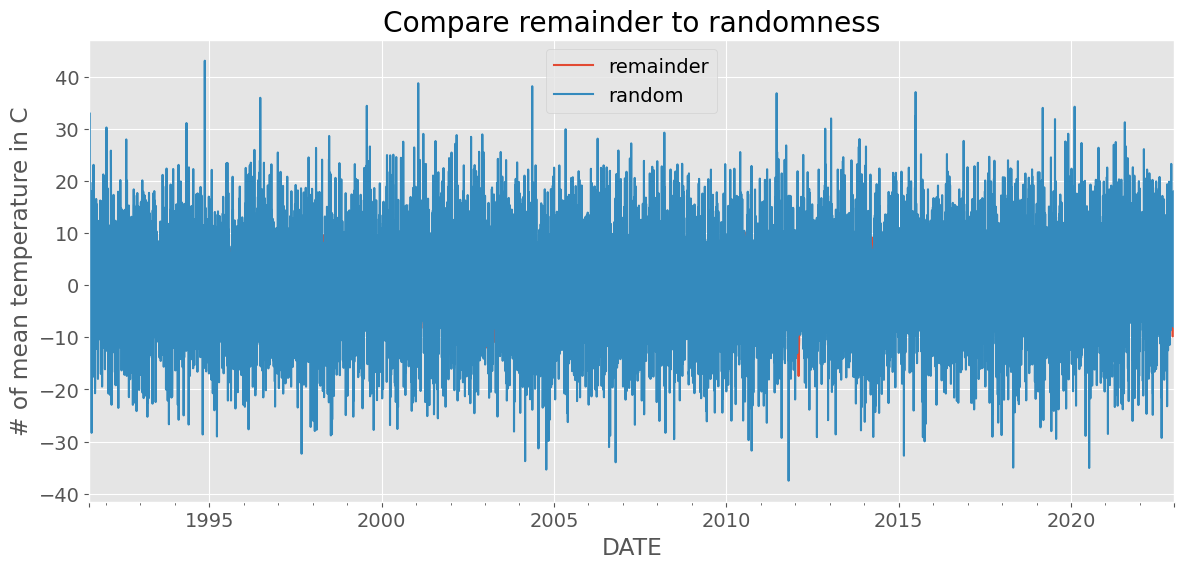

In [70]:
plot_meantemp(df[['remainder', 'random']], title='Compare remainder to randomness', ylim=False)

In [71]:
df['remainder'].to_csv('temperature_remainder_1991.csv')

In [72]:
df_rem = pd.read_csv('temperature_remainder_1991.csv', index_col=0, parse_dates=True)
df_rem.head()

,remainder
DATE,
1991-07-09,4.023309
1991-07-10,0.223168
1991-07-11,5.423028
1991-07-12,6.322888
1991-07-13,2.522748


In [73]:
# Plot the data
def plot_remainder(df_rem, title='Remaining Temperature after Extracting Trend and Seasonality'):
    df_rem.plot()
    plt.title(title)
    plt.ylabel('# of mean temperature in C')
    plt.show()

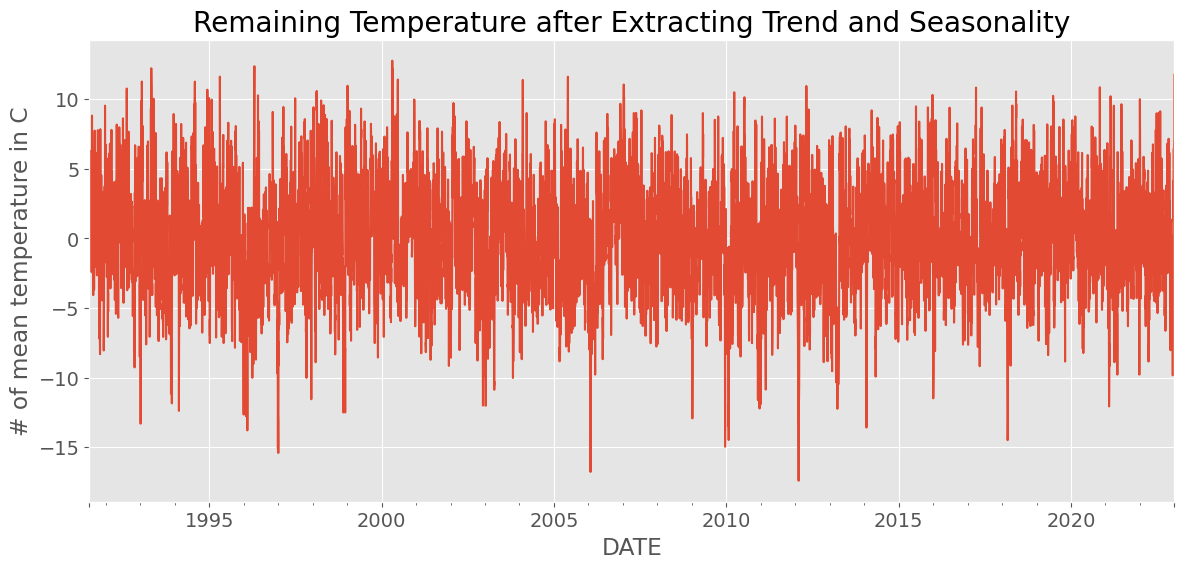

In [74]:
plot_remainder(df_rem['remainder'])

### Create a time-lagged input feature: lag1

In [75]:
df_rem

,remainder
DATE,
1991-07-09,4.023309
1991-07-10,0.223168
1991-07-11,5.423028
1991-07-12,6.322888
1991-07-13,2.522748
...,...
2022-12-27,1.157946
2022-12-28,3.257806
2022-12-29,6.957666


In [76]:
df_rem['lag1'] = df_rem['remainder'].shift(1)

df_rem

,remainder,lag1
DATE,,
1991-07-09,4.023309,NaN
1991-07-10,0.223168,4.023309
1991-07-11,5.423028,0.223168
1991-07-12,6.322888,5.423028
1991-07-13,2.522748,6.322888
...,...,...
2022-12-27,1.157946,6.458086
2022-12-28,3.257806,1.157946
2022-12-29,6.957666,3.257806


In [77]:
df_rem.corr()

,remainder,lag1
remainder,1.000000,0.808959
lag1,0.808959,1.000000


### Plot remainder against lag1

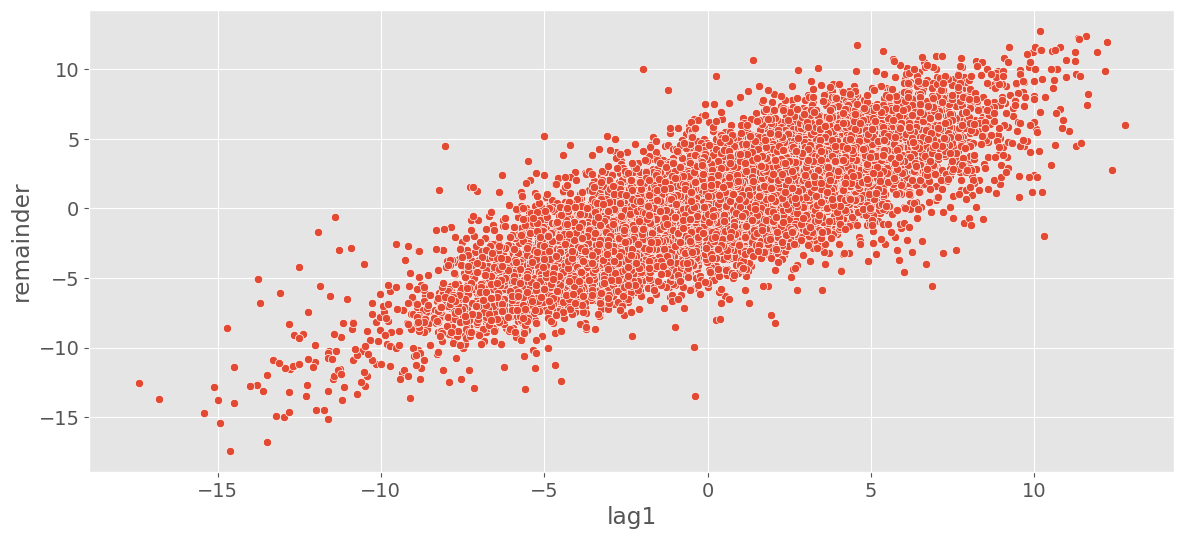

In [78]:
sns.scatterplot(x='lag1', y='remainder', data=df_rem);

### Run an Autoregression (Linear Regression) of lag1 on the remainder

In [79]:
# Drop missing values
df_rem.dropna(inplace=True)
df_rem.head()

,remainder,lag1
DATE,,
1991-07-10,0.223168,4.023309
1991-07-11,5.423028,0.223168
1991-07-12,6.322888,5.423028
1991-07-13,2.522748,6.322888
1991-07-14,-0.777392,2.522748


In [80]:
# Assign X and y
X = df_rem[['lag1']]
y = df_rem['remainder']

In [81]:
# Create and fit the model
m = LinearRegression()
m.fit(X, y)

LinearRegression()

In [82]:
# Create predictions
df_rem['predictions_ar1'] = m.predict(X)
df_rem.head()

,remainder,lag1,predictions_ar1
DATE,,,
1991-07-10,0.223168,4.023309,3.256305
1991-07-11,5.423028,0.223168,0.181075
1991-07-12,6.322888,5.423028,4.389015
1991-07-13,2.522748,6.322888,5.117219
1991-07-14,-0.777392,2.522748,2.041989


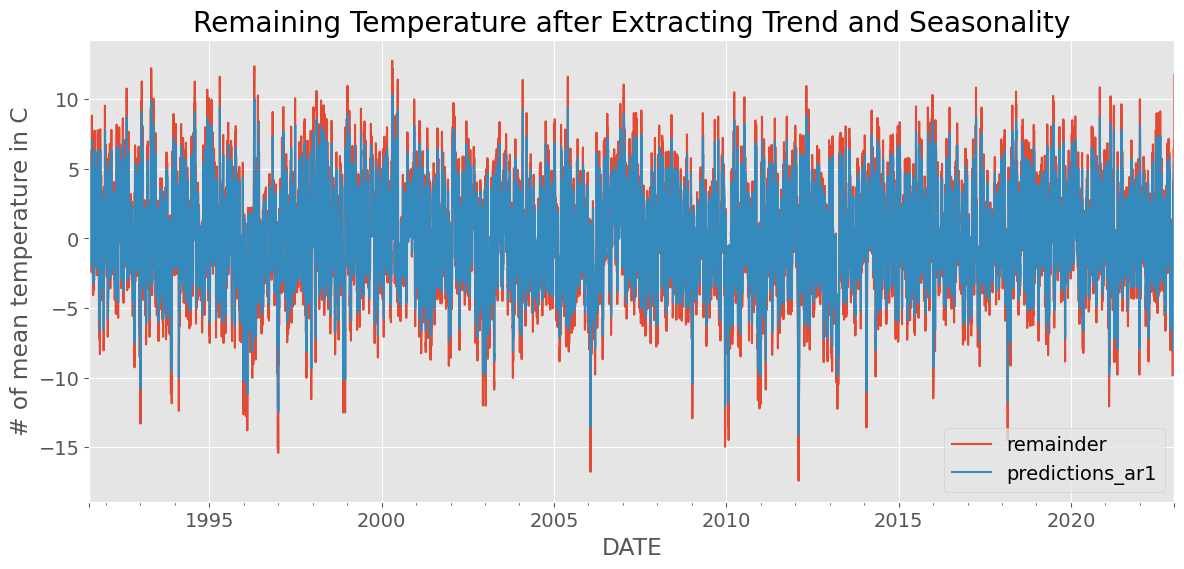

In [83]:
# Plot the original remainder and the prediction
plot_remainder(df_rem[['remainder', 'predictions_ar1']])

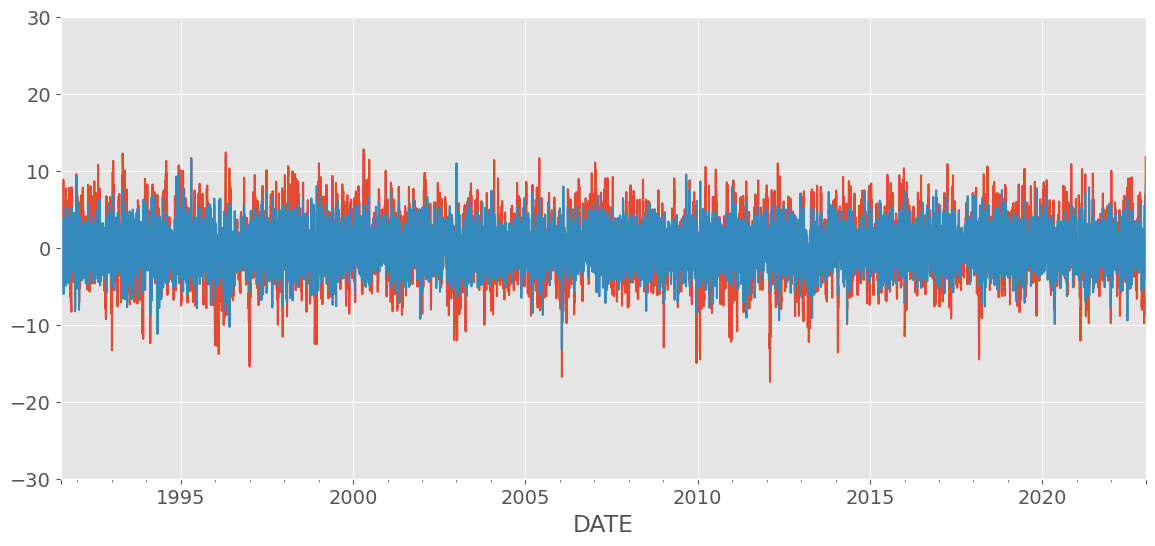

In [84]:
# Is the remainder prediction error smaller than the remainder itself?
df_rem['remainder'].plot(ylim=[-30,30])
(df_rem['remainder'] - df_rem['predictions_ar1']).plot(ylim=[-30,30]);

### Should we add another lag (lag2)?

In [85]:
df_rem['lag2'] = df_rem['remainder'].shift(2)
df_rem['lag3'] = df_rem['remainder'].shift(3)

df_rem.head()

,remainder,lag1,predictions_ar1,lag2,lag3
DATE,,,,,
1991-07-10,0.223168,4.023309,3.256305,NaN,NaN
1991-07-11,5.423028,0.223168,0.181075,NaN,NaN
1991-07-12,6.322888,5.423028,4.389015,0.223168,NaN
1991-07-13,2.522748,6.322888,5.117219,5.423028,0.223168
1991-07-14,-0.777392,2.522748,2.041989,6.322888,5.423028


In [86]:
round(df_rem[['remainder', 'lag1', 'lag2','lag3']].corr(), 2)

,remainder,lag1,lag2,lag3
remainder,1.00,0.81,0.60,0.46
lag1,0.81,1.00,0.81,0.60
lag2,0.60,0.81,1.00,0.81
lag3,0.46,0.60,0.81,1.00


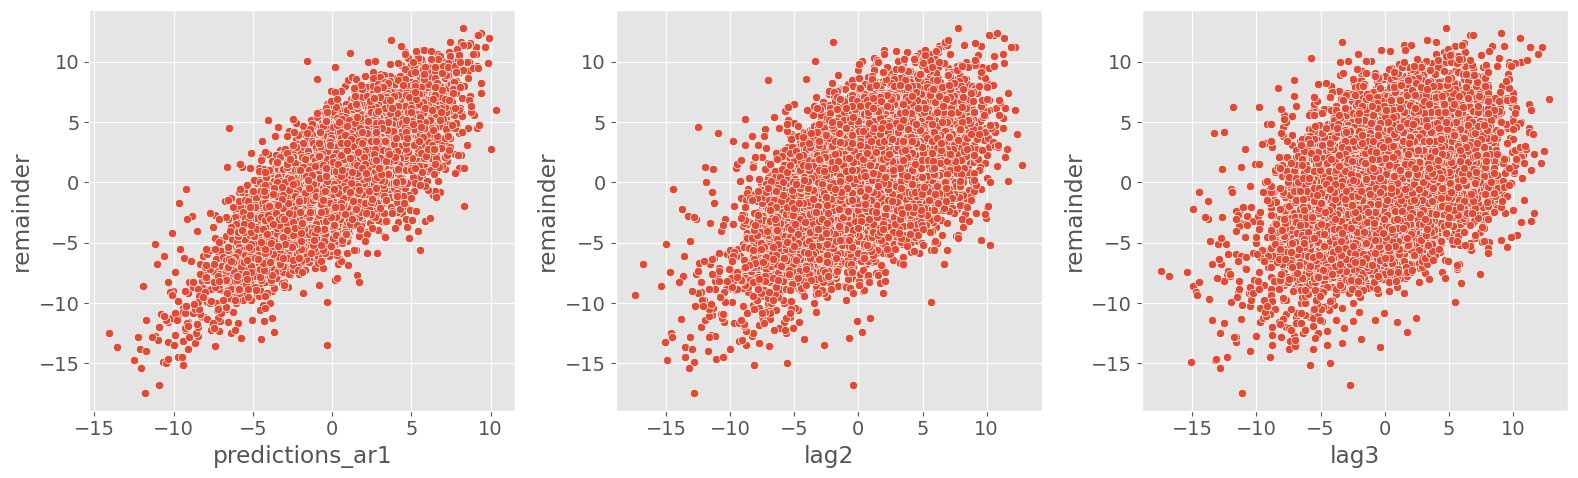

In [87]:
import matplotlib.gridspec as gridspec
#sns.set() # set seaborn as default style
p=3
lag_columns = df_rem.columns[-p:]
fig, axes = plt.subplots(1,p, figsize=(16,5),dpi=100)
gs = gridspec.GridSpec(1,p)

for i in range(p):
    sns.scatterplot(x=df_rem[lag_columns[i]],y=df_rem['remainder'],ax=axes[i])
    
plt.tight_layout()

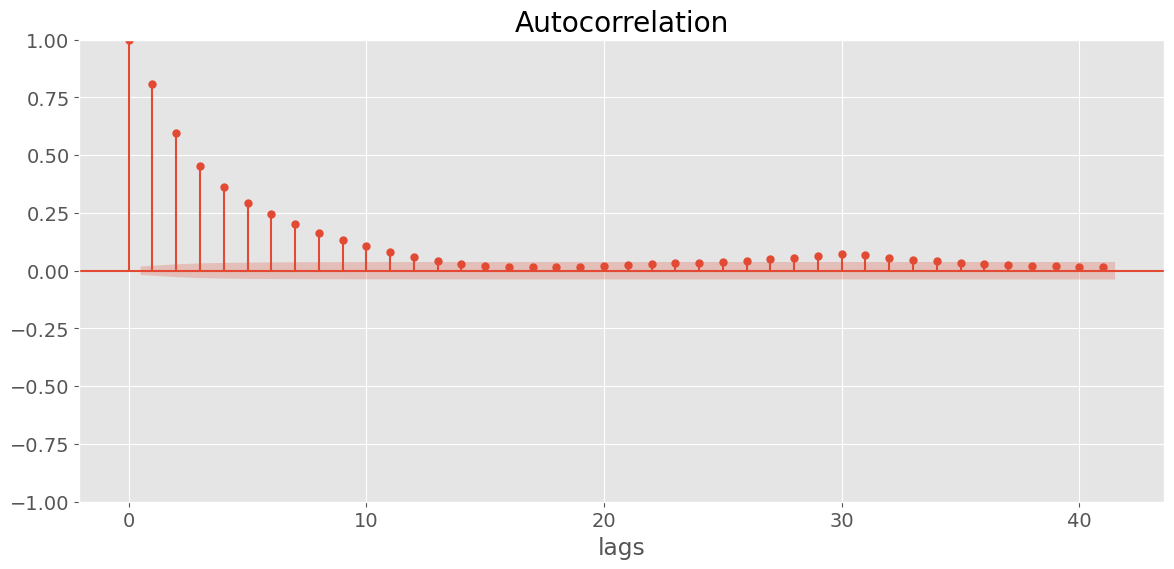

In [88]:
from statsmodels.graphics.tsaplots import plot_acf
plot_acf(df_rem['remainder'])
plt.xlabel('lags');

In [91]:
# white noise or random noise
import numpy as np
random_array = np.random.normal(loc=0, scale=10, size=11498)
df_rem['random'] = random_array

<AxesSubplot: xlabel='DATE'>

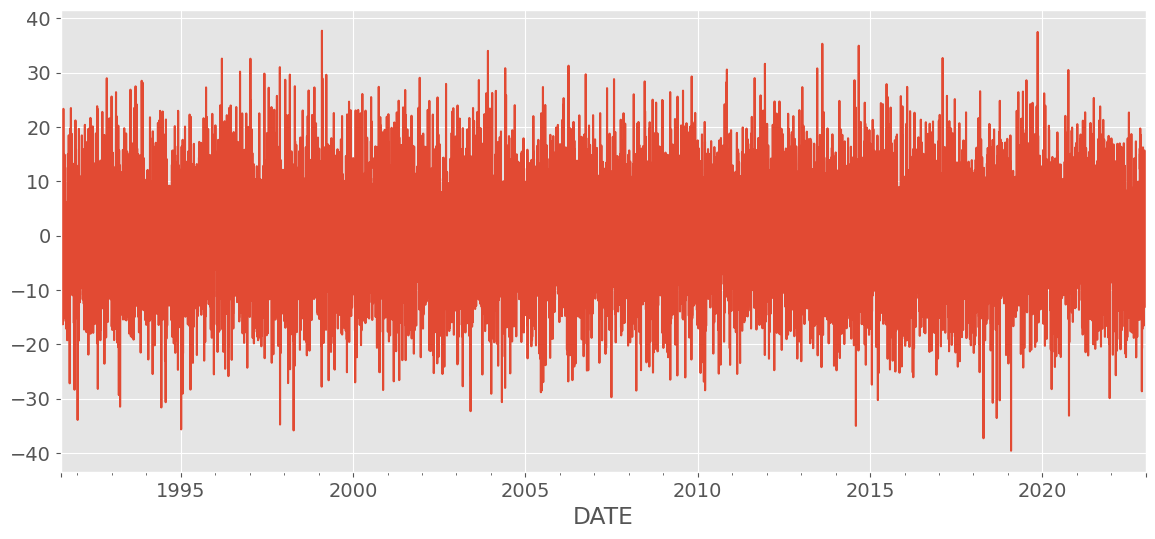

In [92]:
df_rem['random'].plot()

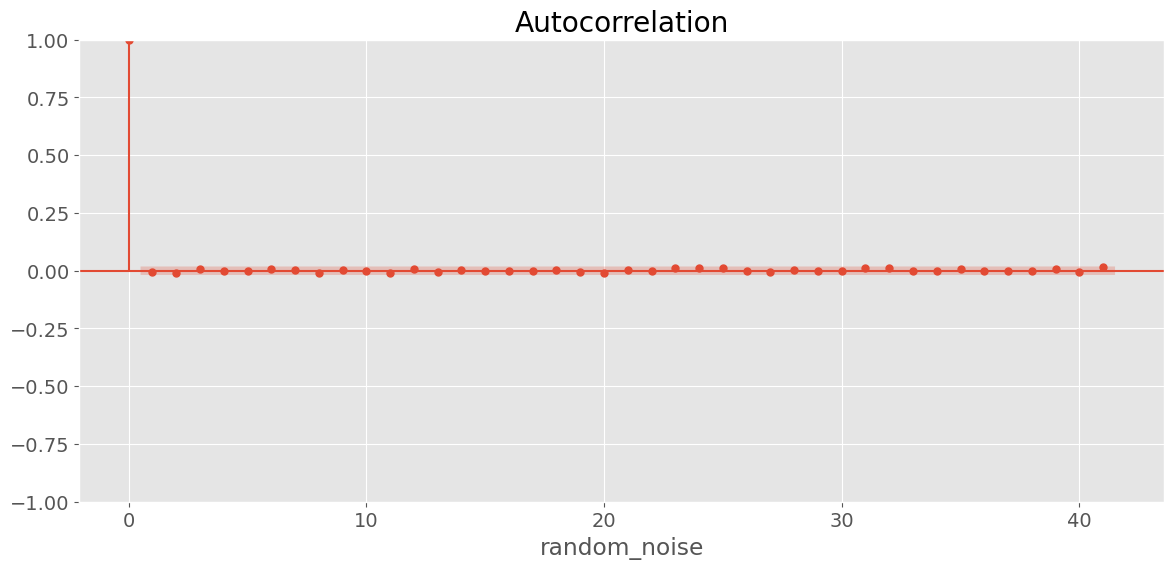

In [93]:
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf
plot_acf(df_rem['random'])
plt.xlabel('random_noise');

### Determine _Partial_ Autocorrelation

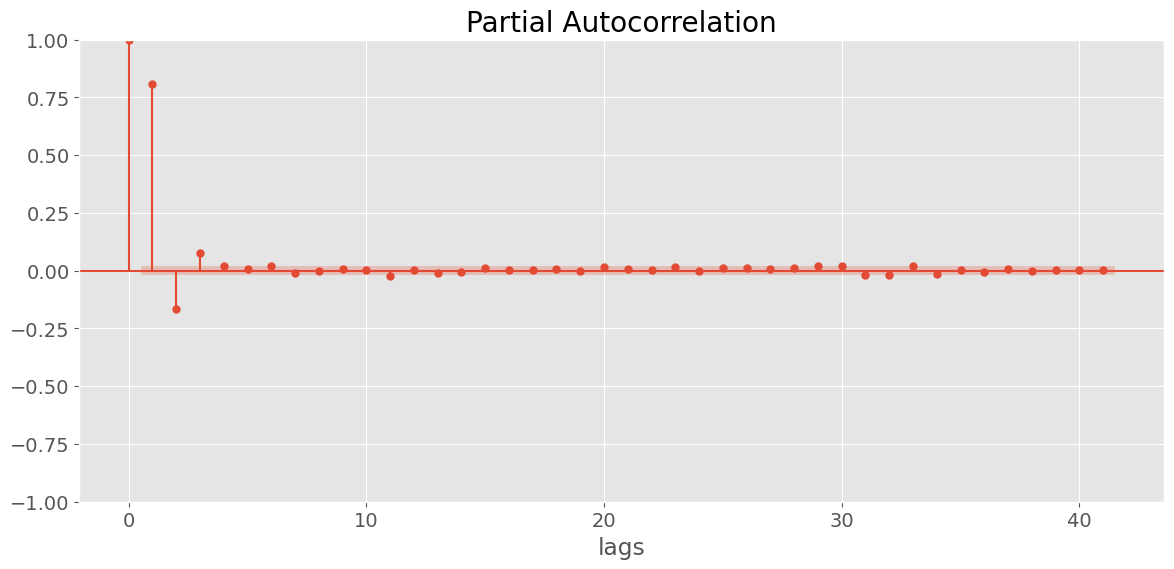

In [94]:
# Statsmodels provides a function called plot_pacf
# plot partial autocorrelation function
from statsmodels.graphics.tsaplots import plot_pacf
plot_pacf(df_rem['remainder'])
plt.xlabel('lags');

In [95]:
from statsmodels.tsa.ar_model import ar_select_order
lags_order = ar_select_order(df_rem['remainder'], maxlag=5)

In [96]:
lags_order.ar_lags

[1, 2, 3]

In [97]:
lags_order.bic

{(1, 2, 3): 51348.09627561818,
 (1, 2, 3, 4): 51352.10992680867,
 (1, 2, 3, 4, 5): 51360.519000575216,
 (1, 2): 51405.97997888165,
 (1,): 51713.26009687568,
 0: 63920.85873401468}

### OLS Regression

#### on Xtrain_tran

In [ ]:
# Create a list of features
forward_features = []

# Original features
feature_list = Xtrain_tran.columns

In [ ]:
feature_list

In [ ]:
possible_models = pd.DataFrame(columns=['features', 'p', 'r2'])
# Run a linear regression separately on each of the features

In [ ]:
while len(feature_list) > 0:
    forward_selection = pd.DataFrame(columns=['features', 'p', 'r2'])
    for feature in feature_list:
        m_feature = OLS(ytrain, Xtrain_tran[forward_features + [feature]])
#         print(forward_features + [feature])
        result = m_feature.fit()
#         print(result.summary())
        forward_selection = forward_selection.append({
                                    'feature': feature
                                  , 'features': forward_features + [feature]
                                  , 'p': result.pvalues.loc[feature]
                                  , 'r2': result.rsquared}
                                  , ignore_index=True)

    # p > 0.05 -> not significant
    # p <= 0.05 significant
    # p <= 0.01 very significant
    # p <= 0.001 highly significant

    if forward_selection.sort_values('p').iloc[0].p < 0.05:
        print(forward_selection.sort_values('p').iloc[0].features)
        best_feature = forward_selection.sort_values('p').iloc[0].feature
        forward_features.append(best_feature)
        feature_list = feature_list.drop(best_feature)
        best_model = forward_selection[forward_selection['feature']==best_feature]
        possible_models = possible_models.append(best_model, ignore_index=True)

    else:
        break

In [ ]:
result.summary()